In [1]:
import pandas as pd 
df = pd.read_csv('../chifoumy/data/chifoumi-dataset.csv')
df.head(2)

,1x,1y,2x,2y,3x,3y,4x,4y,5x,5y,...,17y,18x,18y,19x,19y,20x,20y,21x,21y,target
0,0.972548,0.503541,0.888238,0.670902,0.766331,0.698617,0.688033,0.595593,0.653848,0.487888,...,0.439262,0.785297,0.249039,0.682782,0.291712,0.707206,0.337388,0.752084,0.343444,2
1,0.883314,0.585556,0.758897,0.738274,0.619175,0.731899,0.540562,0.609661,0.514005,0.497798,...,0.516720,0.639559,0.312580,0.554995,0.351059,0.577250,0.405897,0.619907,0.421913,2


In [2]:
X = df.drop(columns = "target")
y = df['target']

In [20]:
y.value_counts()

1    699
2    680
0    670
Name: target, dtype: int64

In [10]:
y.shape

(2049,)

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_scaled.shape

(2049, 42)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
import matplotlib.pyplot as plt

model = RandomForestClassifier()


search_space = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf' : [0.1, 0.5, 1, 2, 5],
    'min_samples_split' : [0.1, 0.5, 2, 5, 10]
}

rsearch = GridSearchCV(
    model, search_space,
    n_jobs=-1, scoring='accuracy', cv=5, verbose=0)
rsearch.fit(X_scaled,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [0.1, 0.5, 1, 2, 5],
                         'min_samples_split': [0.1, 0.5, 2, 5, 10]},
             scoring='accuracy')

In [42]:
rsearch.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [44]:
model = RandomForestClassifier(criterion = 'gini', min_samples_leaf= 1, min_samples_split= 2)

In [45]:
cv_results = cross_validate(model, X_scaled, y, scoring = "accuracy", cv=5)

In [46]:
cv_results['test_score'].mean()

0.9985353926888901

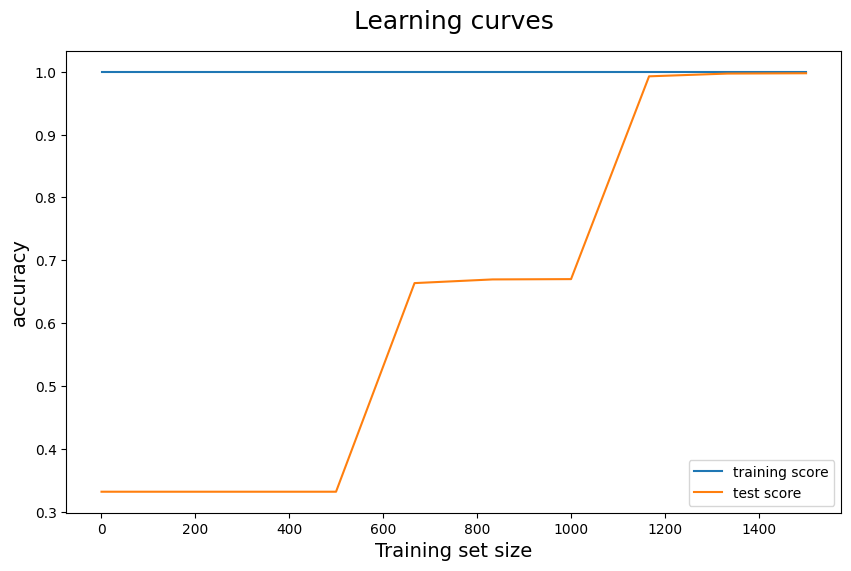

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes = np.linspace(1,1500, 10, dtype='int')

train_sizes, train_scores, test_scores = learning_curve(estimator = model, 
                                          X = X_scaled,
                                          y= y,
                                          train_sizes = train_sizes,    
                                          scoring = 'accuracy',
                                          cv = 5)

train_scores_mean = np.mean(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)



plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label = 'training score')
plt.plot(train_sizes, test_scores_mean, label = 'test score')
plt.ylabel('accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend();

In [48]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred = model.predict(X_test)

In [50]:
results = pd.DataFrame({"actual" : y_test,
                       "predicted" : y_pred})

confusion_matrix = pd.crosstab(index= results['actual'],
                              columns = results['predicted'])
confusion_matrix

predicted,0,1,2
actual,,,
0,221,0,0
1,1,196,0
2,0,0,197
